In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.compose
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import r2_score

In [2]:
#data cleaning

dataset_path = 'Admission_Predict.csv'
df = pd.read_csv(dataset_path)
df = df.drop(['Serial No.'],axis=1)
x = df.iloc[:,0:-1]
y = df.iloc[:,-1] 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)
num_features = x.select_dtypes(include=['float64', 'int64'])
num_columns = num_features.columns
ct = ColumnTransformer([("only numeric",StandardScaler(),num_columns)],remainder='passthrough')

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)


In [3]:
#build model

my_model = Sequential()

my_model.add(InputLayer(shape=(x_train.shape[1],)))
my_model.add(Dense(16,activation='relu'))
my_model.add(layers.Dropout(0.1))
my_model.add(Dense(8,activation='relu'))
my_model.add(layers.Dropout(0.2))
my_model.add(Dense(1))

opt = Adam(learning_rate=0.005)
my_model.compile(loss='mse',metrics=['mae'],optimizer=opt)

In [4]:
#training
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = my_model.fit(x_train,y_train,epochs=100,batch_size=8,verbose=1,validation_split=0.25,callbacks=[es])

#testing
res_mse,res_mae = my_model.evaluate(x_test,y_test,verbose=0)

print("++++++++++++++")
print("MSE result : "+str(res_mse))
print("MAE result : "+str(res_mae))
print("++++++++++++++")

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5436 - mae: 1.0027 - val_loss: 0.1150 - val_mae: 0.2832
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.2031 - mae: 0.3707 - val_loss: 0.0624 - val_mae: 0.1943
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.1261 - mae: 0.2857 - val_loss: 0.0356 - val_mae: 0.1478
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0764 - mae: 0.2212 - val_loss: 0.0289 - val_mae: 0.1347
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0648 - mae: 0.2049 - val_loss: 0.0193 - val_mae: 0.1093
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0651 - mae: 0.1930 - val_loss: 0.0153 - val_mae: 0.0996
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.0618 - mae: 0.1823 - val_loss: 0.0108 - val_mae: 0.0787
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0375 - mae: 0.1486 - val_loss: 0.0138 - val_mae: 0.0975
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/st

In [5]:
y.describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

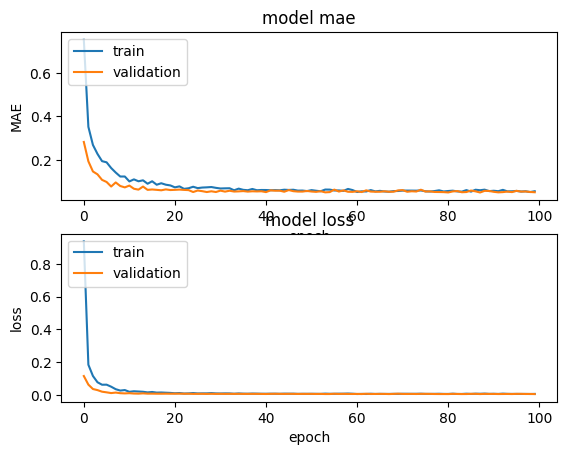

In [6]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

In [7]:
y_pred = my_model.predict(x_test)
print(r2_score(y_test,y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.7565838694572449
